<a href="https://colab.research.google.com/github/VatsSShah/Sign-Language/blob/main/IPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
import os
import zipfile
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shutil

def explore_directory(path, indent=""):
    """Recursively explore and print directory contents"""
    print(f"{indent}Exploring: {path}")
    try:
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                print(f"{indent}└── Directory: {item}")
                explore_directory(item_path, indent + "    ")
            else:
                print(f"{indent}└── File: {item}")
    except Exception as e:
        print(f"{indent}Error accessing {path}: {str(e)}")

def analyze_zip_contents(zip_path):
    """Analyze and print zip file contents"""
    print(f"\nAnalyzing zip file: {zip_path}")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            print("\nZip file contents:")
            for file_info in zip_ref.filelist:
                print(f"└── {file_info.filename} ({file_info.file_size} bytes)")
            return True
    except Exception as e:
        print(f"Error analyzing zip file: {str(e)}")
        return False

def load_data(data_path):
    """Load and process the sensor data"""
    sequences = []
    labels = []
    print("\nLoading data from:", data_path)

    try:
        # List all items in the root directory
        root_items = sorted(os.listdir(data_path))
        print(f"Found {len(root_items)} items in root directory:")
        for item in root_items:
            print(f"└── {item}")

        # First, try processing as a directory structure with class folders
        has_directories = any(os.path.isdir(os.path.join(data_path, item)) for item in root_items)

        if has_directories:
            print("\nProcessing data from class directories...")
            for class_name in root_items:
                class_path = os.path.join(data_path, class_name)
                if os.path.isdir(class_path):
                    print(f"\nProcessing class: {class_name}")
                    class_idx = int(class_name) if class_name.isdigit() else len(sequences)
                    files_processed = 0

                    for file_name in os.listdir(class_path):
                        if file_name.endswith('.csv'):
                            file_path = os.path.join(class_path, file_name)
                            try:
                                df = pd.read_csv(file_path)
                                print(f"Processing {file_name} (shape: {df.shape})")

                                sequence = df.values
                                # Standardize sequence length to 30 frames
                                if len(sequence) > 30:
                                    sequence = sequence[:30]
                                elif len(sequence) < 30:
                                    padding = np.zeros((30 - len(sequence), sequence.shape[1]))
                                    sequence = np.vstack([sequence, padding])

                                sequences.append(sequence)
                                labels.append(class_idx)
                                files_processed += 1

                            except Exception as e:
                                print(f"Error processing {file_path}: {str(e)}")

                    print(f"Processed {files_processed} files for class {class_name}")
        else:
            # Process flat structure (all CSV files in root)
            print("\nProcessing data from flat file structure...")
            for file_name in root_items:
                if file_name.endswith('.csv'):
                    file_path = os.path.join(data_path, file_name)
                    try:
                        df = pd.read_csv(file_path)
                        print(f"\nProcessing {file_name}")
                        print("CSV shape:", df.shape)

                        sequence = df.values
                        # Standardize sequence length to 30 frames
                        if len(sequence) > 30:
                            sequence = sequence[:30]
                        elif len(sequence) < 30:
                            padding = np.zeros((30 - len(sequence), sequence.shape[1]))
                            sequence = np.vstack([sequence, padding])

                        # Extract label from filename (e.g., "sensors_data_1.csv" -> 0)
                        try:
                            label = int(''.join(filter(str.isdigit, file_name))) - 1
                        except:
                            label = len(sequences)

                        sequences.append(sequence)
                        labels.append(label)

                    except Exception as e:
                        print(f"Error processing {file_path}: {str(e)}")

    except Exception as e:
        print(f"Error in data loading: {str(e)}")
        raise

    if len(sequences) == 0:
        raise ValueError("No data was loaded. Please check the file structure and contents.")

    return np.array(sequences), np.array(labels)

# Main execution
print("Please upload your 'Sensor based ASL.zip' file...")
try:
    # Clean up any existing dataset directory
    if os.path.exists("/content/dataset"):
        shutil.rmtree("/content/dataset")

    # Create fresh dataset directory
    os.makedirs("/content/dataset", exist_ok=True)

    # Upload file
    uploaded = files.upload()

    if len(uploaded) == 0:
        raise ValueError("No file was uploaded")

    # Get the uploaded file name
    zip_filename = list(uploaded.keys())[0]
    print(f"Uploaded file: {zip_filename}")

    if not zip_filename.endswith('.zip'):
        raise ValueError("Please upload a zip file")

    # Analyze zip contents
    if not analyze_zip_contents(zip_filename):
        raise ValueError("Invalid zip file")

    # Extract dataset
    print("\nExtracting dataset...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("/content/dataset")
    print("Extraction complete!")

    # Explore extracted directory structure
    print("\nExploring extracted directory structure:")
    explore_directory("/content/dataset")

    # Load data
    X, y = load_data("/content/dataset")
    print(f"\nFinal data shapes:")
    print(f"Features shape: {X.shape}")
    print(f"Labels shape: {y.shape}")

    # Print class distribution
    unique_labels, counts = np.unique(y, return_counts=True)
    print("\nClass distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"Class {label}: {count} samples")

except Exception as e:
    print(f"\nAn error occurred: {str(e)}")

Please upload your 'Sensor based ASL.zip' file...


Saving Sensor based ASL.zip to Sensor based ASL (3).zip
Uploaded file: Sensor based ASL (3).zip

Analyzing zip file: Sensor based ASL (3).zip

Zip file contents:
└── pause_sign.csv (631071 bytes)
└── sensor_data_4.csv (1050732 bytes)
└── sensors_data_1.csv (1242650 bytes)
└── sensors_data_2.csv (1257000 bytes)
└── sensors_data_3.csv (1238412 bytes)

Extracting dataset...
Extraction complete!

Exploring extracted directory structure:
Exploring: /content/dataset
└── File: sensors_data_2.csv
└── File: sensor_data_4.csv
└── File: pause_sign.csv
└── File: sensors_data_1.csv
└── File: sensors_data_3.csv

Loading data from: /content/dataset
Found 5 items in root directory:
└── pause_sign.csv
└── sensor_data_4.csv
└── sensors_data_1.csv
└── sensors_data_2.csv
└── sensors_data_3.csv

Processing data from flat file structure...

Processing pause_sign.csv
CSV shape: (300, 441)

Processing sensor_data_4.csv
CSV shape: (499, 441)

Processing sensors_data_1.csv
CSV shape: (593, 441)

Processing sens


Loading and cleaning data from: /content/dataset
Found 5 items in root directory:


<ipython-input-8-723e66918a7a>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('PAUSE', 0)



Starting Leave-One-Out Cross Validation...
Total samples: 10

Fold 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sample 1 - True label: 0, Predicted: 0

Fold 2/10
Sample 2 - True label: 0, Predicted: 0

Fold 3/10
Sample 3 - True label: 3, Predicted: 3

Fold 4/10
Sample 4 - True label: 3, Predicted: 3

Fold 5/10
Sample 5 - True label: 0, Predicted: 0

Fold 6/10
Sample 6 - True label: 0, Predicted: 0

Fold 7/10
Sample 7 - True label: 1, Predicted: 1

Fold 8/10
Sample 8 - True label: 1, Predicted: 1

Fold 9/10
Sample 9 - True label: 2, Predicted: 2

Fold 10/10
Sample 10 - True label: 2, Predicted: 2

Cross-validation Results:
Average Accuracy: 100.00%
Standard Deviation: 0.00%


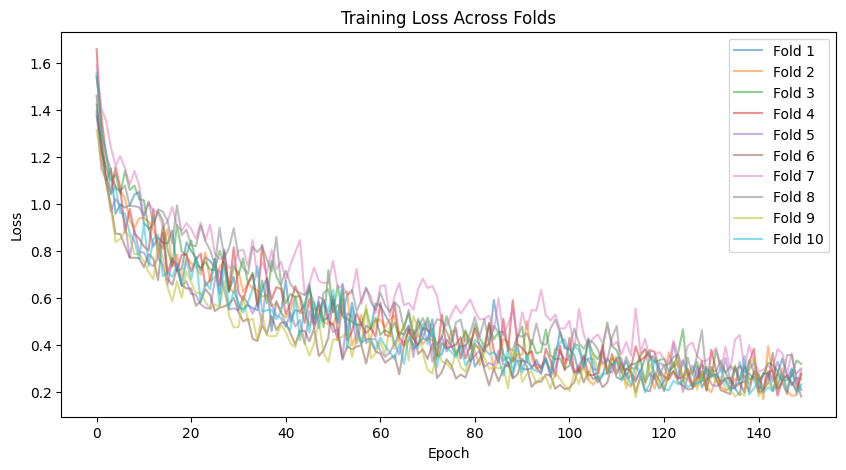

In [8]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneOut
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

def clean_and_process_data(data_path):
    """Load and process the sensor data with improved data cleaning and augmentation"""
    sequences = []
    labels = []
    print("\nLoading and cleaning data from:", data_path)

    try:
        root_items = sorted(os.listdir(data_path))
        print(f"Found {len(root_items)} items in root directory:")

        for file_name in root_items:
            if file_name.endswith('.csv'):
                file_path = os.path.join(data_path, file_name)
                try:
                    # Read CSV
                    df = pd.read_csv(file_path)

                    # Clean the data
                    df = df.replace('PAUSE', 0)

                    # Convert all columns to numeric, replacing errors with 0
                    for col in df.columns:
                        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

                    # Add basic statistical features
                    df_stats = pd.DataFrame({
                        'mean': df.mean(axis=1),
                        'std': df.std(axis=1),
                        'max': df.max(axis=1),
                        'min': df.min(axis=1)
                    })
                    df = pd.concat([df, df_stats], axis=1)

                    sequence = df.values

                    # Standardize sequence length to 30 frames
                    if len(sequence) > 30:
                        sequence = sequence[:30]
                    elif len(sequence) < 30:
                        padding = np.zeros((30 - len(sequence), sequence.shape[1]))
                        sequence = np.vstack([sequence, padding])

                    # Extract label from filename
                    if 'pause' in file_name.lower():
                        label = 0
                    else:
                        try:
                            label = int(''.join(filter(str.isdigit, file_name))) - 1
                        except:
                            label = len(sequences)

                    # Data augmentation for small dataset
                    # Add original sequence
                    sequences.append(sequence)
                    labels.append(label)

                    # Add slightly noisy version
                    noisy_sequence = sequence + np.random.normal(0, 0.01, sequence.shape)
                    sequences.append(noisy_sequence)
                    labels.append(label)

                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")

    except Exception as e:
        print(f"Error in data loading: {str(e)}")
        raise

    return np.array(sequences), np.array(labels)

def create_model(input_shape, num_classes):
    """Create a simpler model better suited for small datasets"""
    model = Sequential([
        LSTM(16, input_shape=input_shape,
             kernel_regularizer=l2(0.001),
             recurrent_regularizer=l2(0.001),
             return_sequences=True),
        Dropout(0.2),
        LSTM(8,
             kernel_regularizer=l2(0.001),
             recurrent_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Load and clean the data
X, y = clean_and_process_data("/content/dataset")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

# Implement Leave-One-Out Cross Validation
loo = LeaveOneOut()
histories = []
test_accuracies = []
predictions = []
true_labels = []

print("\nStarting Leave-One-Out Cross Validation...")
print(f"Total samples: {len(X_scaled)}")

for i, (train_idx, test_idx) in enumerate(loo.split(X_scaled)):
    print(f"\nFold {i+1}/{len(X_scaled)}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Create and train model
    model = create_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        num_classes=len(np.unique(y))
    )

    # Early stopping with longer patience
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=30,
        restore_best_weights=True
    )

    # Train the model with class weights to handle imbalance
    class_weights = dict(zip(
        np.unique(y_train),
        len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
    ))

    history = model.fit(
        X_train, y_train,
        epochs=150,
        batch_size=2,
        verbose=0,
        callbacks=[early_stopping],
        class_weight=class_weights
    )

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)

    # Store predictions
    pred = model.predict(X_test, verbose=0)
    pred_label = np.argmax(pred[0])
    predictions.append(pred_label)
    true_labels.append(y_test[0])

    histories.append(history.history['loss'])

    print(f"Sample {i+1} - True label: {y_test[0]}, Predicted: {pred_label}")

# Print overall results
print("\nCross-validation Results:")
print(f"Average Accuracy: {np.mean(test_accuracies)*100:.2f}%")
print(f"Standard Deviation: {np.std(test_accuracies)*100:.2f}%")

# Plot training loss across all folds
plt.figure(figsize=(10, 5))
for i, loss in enumerate(histories):
    plt.plot(loss, label=f'Fold {i+1}', alpha=0.5)
plt.title('Training Loss Across Folds')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()